## 계산그래프
계산과정을 그래프로 나타낸 것이다. 

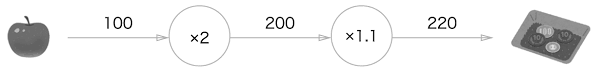  

계산 그래프는 계산과정을 노드와 화살표로 표현한다. 노드는 원으로 표기하고 원 안에 연산 내용을 적는다.   
계산결과를 화살표 위에 적어 각 노드의 계산 결과가 왼쪽에서 오른쪽으로 전해지게 한다. 

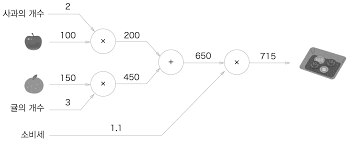  

####  계산 그래프의 문제풀이 흐름
* 계산 그래프를 구성 
* 그래프에서 계산을 왼쪽에서 오른쪽으로 진행, 순전파 forward propagation 이라고 한다.순전파는 계산 그래프의 출발점 부터 종착점으로 전파

## 국소적 계산 

계산 그래프의 특징을 국소적(자신과 직접 관계된 작은 범위) 계산을 전파함으로써 최종결과를 얻는다는 점이다.   
국소적 계산은 결국 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 결과를 출력할 수 있다는 것 

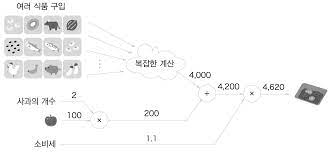  

각 노드에서의 계산은 국소적 계산, 각 노드는 자신과 관련한 계산외에는 신경 쓰지 않는다. 

## 연쇄법칙, 함성함수의 미분에 대한 성질

#### 합성함수란 여러 함수로 구성된 함수 
합성함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.

* z = t**2 ,  t = x +y   
* x에 대한 z의 미분은 t에 대한 z의 미분과 x에 대한 t의 미분의 곱 

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8bQ1RnXNleHi9b0U3A1ZuKqV5BAH_IVOhNw&usqp=CAU" width="200" height="300"/>  

계산 그래프의 역전파는 오른쪽에서 왼쪽으로 신호를 전파한다. 역전파의 계산 절파에서는 노드로 들어온 입력 신호에 그 노드의 국소적 미분을 곱한 후 다음 노드로 전달  
<img src="https://blog.kakaocdn.net/dn/BLeIk/btqInOkpSrO/ZriGfBidyOqeudtrwgWwnk/img.png" width="300" height="300"/> 
 

## 역전파

### 덧셈노드의 역전파 
역전파의 입력 값을 그래도 흘려보낸다.   


### 곱셈 노드의 역전파 
곱셈노드 역전파는 상류의 값에 순전파 때의 입력 신호들을 '서로 바꾼값'을 곱해서 하류로 보낸다.   
순전파 때 x였다면 역전파에서는 y, 순전파 때 y였다면 x로 역전파에서는 x로 바꾼다는 의미이다. 

<img src="https://blog.kakaocdn.net/dn/FabRv/btqAKjcZ0SZ/SRGGRMzp2gGD6nlfjKTPVK/img.png" width="300" height="300"/> 
 

In [1]:
# 곱셈 계층 

class MulLayer :
    def __init__ (self) :
        self.x = None
        self.y = None
    
    def forward(self, x, y) :
        self.x = x 
        self.y = y
        out = x * y
    
        return out
    
    # 상류에서 넘어온 미분(dout)에 순전파 때의 값을 서로 바꿔 곱한 후 하류로 보낸다.
    def backward(self , dout) :
        dx = dout * self.y # x와 y를 바꾼다. 
        dy = dout * self.x 
        
        return dx, dy

In [2]:
apple = 100
apple_num = 2
tax = 1.1 

# 계층들 
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

#순전파 
apple_price = mul_apple_layer.forward(apple,  apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [3]:
# 역전파 

dprice = 1
dapple_price , dtax = mul_tax_layer.backward(dprice)
dapple , dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple , dapple_num ,dtax)

2.2 110.00000000000001 200


In [4]:
# 덧셈계층 
class AddLayer :
    def __init__ (self) :
        pass
    
    def forward(self ,x ,y ) :
        out = x + y
        return out
    
    def backward(self , dout) :
        dx = dout * 1
        dy = dout * 1
        return dx , dy

In [5]:
# 사과 2개와 귤 3개 구입 

apple = 100
apple_num = 2 
orange = 150
orange_num = 3
tax = 1.1


# 계층들 
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파 
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

In [6]:
print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


## 활성화 함수 계층 구현

### ReLu 계층 

순전파 때의 일력인 x가 0보다 크면 역전파는 상류의 값을 그대로 하류로 흘린다.  x가 0이하면 역전파는 하류로 신호를 보내지 않는다. 

In [7]:
class Relu :
    def __init__ (self) :
        self.mask = None
        
    def forward(self , x) :
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward (self , dout) :
        dout[self.mask] = 0 
        dx = dout 
        
        return dx

Relu 클래스는 mask라는 인스턴스 변수를 갖는다. mask는 true / false로 구성된 넘파이 배열로,   
순전파의 입력인 x의 원소 값이 0이하인 인덱스는 true, 그 외는 false로 유지한다. 

In [9]:
import numpy as np

x = np.array([[1.0, -0.5],[-2.0 , 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [10]:
mask = (x <= 0)
print(mask)

[[False  True]
 [ True False]]


## Sigmoid 계층 

<img src="https://blog.kakaocdn.net/dn/S4aIY/btqAK4Gy0by/qiSZM4buvGUgxbFCurlO40/img.png" width="300" height="300"/> 


**순전파의 출력 y만으로 역전파를 계산할 수 있다.**

In [11]:
class Sigmoid :
    def __init__ (self) :
        self.out = None
        
    def forward (self,  x) :
        out = 1 / (1 + np.exp (-x))
        self.out = out
        
        return out
    
    def backward(self , dout) :
        dx = dout * (1.0 - self.out) * self.out 
        
        return dx